In [1]:

import tensorflow as tf
import numpy as np


In [2]:

## data 선언
x_data =[[1.],[2.],[3.],[4.]]
y_data =[[1.],[3.],[5.],[7.]]

## 평균 0, 분산 1의 파라미터의 정규분포로 부터 값을 가져옴.
# 학습을 통해 업데이트가 되어 변화되는 모델의 파라미터인 w,b를 의미한다.
W=tf.Variable(tf.random.normal((1,1), mean=0, stddev=1.0))
b=tf.Variable(tf.random.normal((1,1), mean=0, stddev=1.0))

## 학습시 업데이트 가중치 변화량을 조절할 learning late를 선언
lr=tf.constant(0.001)

## 학습하는 과정을 저장하기 위한 변수 선언
history=np.zeros([2000,3],'float32')


In [4]:

for i in range(2000):  ## 에폭
    total_error = 0
    for j in range(len(x_data)): ## 배치 1
        ''' 모델 설계'''
        ## data * weight
        WX =tf.matmul([x_data[j]], W)  ## [[1.]]* [[W_init]] / [[2.]]* [[W_update]]
        

        ## bias add
        y_hat = tf.add(WX, b)
        
        '''학습하기'''
        ## 정답인 Y와 출력값의 error 계산
        error = tf.subtract(y_data[j], y_hat) ## (true - prediction)

        ## 경사하강법으로 W와 b 업데이트.
        ## 도함수 구하기
        diff_W = tf.matmul(error,[x_data[j]]) #error*x의 합
        diff_b = error

        ##  업데이트할 만큼 러닝레이트 곱
        diff_W = tf.multiply(lr, diff_W)
        diff_b = tf.multiply(lr, diff_b)  #  lr * (error)

        ## w, b 업데이트
        W=tf.add(W, diff_W) # w + delta w = w + lr * x * (error)
        b=tf.add(b, diff_b) # b + delta b = b + lr * (error)
        #######

        '''각 data set에 따른 학습 error(loss)값'''
        ## 토탈 에러.
        visual_error=tf.square(error)
        total_error = total_error + visual_error

    ## 모든 데이터에 따른 error 값
    print("epoch: ", i, "error : ", total_error/len(x_data))

    ## 출력값, W, b 자체가 2차원읜 [[값]]을 array로 가지고 있습니다.
    ## 때문에 위에서 history로 np로 []를 선언한 다음에 각 1차원의 [값]을 가져와서 저장시켰습니다.
    history[i,:]=[(total_error/len(x_data))[0], W[0], b[0]]



epoch:  0 error :  tf.Tensor([[0.18879968]], shape=(1, 1), dtype=float32)
epoch:  1 error :  tf.Tensor([[0.1885731]], shape=(1, 1), dtype=float32)
epoch:  2 error :  tf.Tensor([[0.18834673]], shape=(1, 1), dtype=float32)
epoch:  3 error :  tf.Tensor([[0.1881207]], shape=(1, 1), dtype=float32)
epoch:  4 error :  tf.Tensor([[0.18789488]], shape=(1, 1), dtype=float32)
epoch:  5 error :  tf.Tensor([[0.18766949]], shape=(1, 1), dtype=float32)
epoch:  6 error :  tf.Tensor([[0.18744437]], shape=(1, 1), dtype=float32)
epoch:  7 error :  tf.Tensor([[0.18721941]], shape=(1, 1), dtype=float32)
epoch:  8 error :  tf.Tensor([[0.18699464]], shape=(1, 1), dtype=float32)
epoch:  9 error :  tf.Tensor([[0.18677038]], shape=(1, 1), dtype=float32)
epoch:  10 error :  tf.Tensor([[0.1865463]], shape=(1, 1), dtype=float32)
epoch:  11 error :  tf.Tensor([[0.18632258]], shape=(1, 1), dtype=float32)
epoch:  12 error :  tf.Tensor([[0.186099]], shape=(1, 1), dtype=float32)
epoch:  13 error :  tf.Tensor([[0.185875

<ipython-input-4-73922f3c3775>:40: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  history[i,:]=[(total_error/len(x_data))[0], W[0], b[0]]


epoch:  34 error :  tf.Tensor([[0.18124874]], shape=(1, 1), dtype=float32)
epoch:  35 error :  tf.Tensor([[0.18103132]], shape=(1, 1), dtype=float32)
epoch:  36 error :  tf.Tensor([[0.18081418]], shape=(1, 1), dtype=float32)
epoch:  37 error :  tf.Tensor([[0.18059729]], shape=(1, 1), dtype=float32)
epoch:  38 error :  tf.Tensor([[0.18038055]], shape=(1, 1), dtype=float32)
epoch:  39 error :  tf.Tensor([[0.18016417]], shape=(1, 1), dtype=float32)
epoch:  40 error :  tf.Tensor([[0.17994809]], shape=(1, 1), dtype=float32)
epoch:  41 error :  tf.Tensor([[0.17973208]], shape=(1, 1), dtype=float32)
epoch:  42 error :  tf.Tensor([[0.17951646]], shape=(1, 1), dtype=float32)
epoch:  43 error :  tf.Tensor([[0.17930114]], shape=(1, 1), dtype=float32)
epoch:  44 error :  tf.Tensor([[0.1790861]], shape=(1, 1), dtype=float32)
epoch:  45 error :  tf.Tensor([[0.17887124]], shape=(1, 1), dtype=float32)
epoch:  46 error :  tf.Tensor([[0.17865667]], shape=(1, 1), dtype=float32)
epoch:  47 error :  tf.Ten

In [11]:

## 학습끝난 후 W와 b로 예측 하기
print(history.shape)
print("W : ", W)
print("b : ", b)
print("input 3 : ", tf.add(tf.matmul([[3.]], W), b))
print("input 4 : ", tf.add(tf.matmul([[4.]], W), b))

(2000, 3)
W :  tf.Tensor([[1.8918315]], shape=(1, 1), dtype=float32)
b :  tf.Tensor([[-0.6806359]], shape=(1, 1), dtype=float32)
input 3 :  tf.Tensor([[4.9948587]], shape=(1, 1), dtype=float32)
input 4 :  tf.Tensor([[6.88669]], shape=(1, 1), dtype=float32)


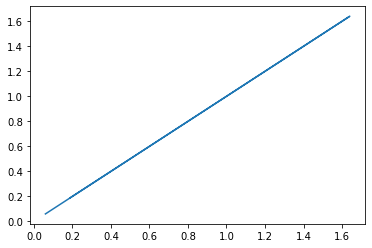

In [12]:
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

plt.plot(history[:][1], history[:][2])
plt.show()